<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Resúmenes examen Unidad 4
<a class="tocSkip">    
</h1> 

# Imports section

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats 

## Probabilidades con pesos


In [39]:
# Para generar un array de probs uniforme
values_X = np.arange(1, 7)
probs_X = np.ones(shape = 6) / 6
print("Eleccion aleatoria de muestra en arr uniforme: " ,np.random.choice(values_X, size=10, p=probs_X))

# Para generar arrays con probabilidades diferentes en funcion del valor
# para hacer un dado cargado, en vez de un sexto para cada numero, nos inventamos unas probabilidades. 
# En este caso, vamos a poner que el 6 sea 9 veces más probable, hay que normalizarlo (dividir entre 14, que es el numero total)
# Si ponemos estas probabilidades, saldrán muchos mas 6
probs_X_pesos = np.array([1,1,1,1,1,9])
# Se puede normalizar de estas dos formas
probs_X_1 = probs_X_pesos/ 14 
# Esta forma es mejor, más automática, si cambias los pesos no tienes que cambiar nada más, porque hace las suma solo.
probs_X_2 = probs_X_pesos/ probs_X_pesos.sum()
# Choice elige aleatoriamente el numero de elementos del array que le pasemos por argumento 
# Pasandole la p, le pasamos las probabilidades que tiene cada numero de salir 
#print(np.random.choice(values_X, size=10, p=probs_X_1))
print("Eleccion aleatoria de muestra con pesos: ", np.random.choice(values_X, size=10, p=probs_X_2))

Eleccion aleatoria de muestra en arr uniforme:  [6 1 4 3 2 1 1 3 4 4]
Eleccion aleatoria de muestra con pesos:  [6 6 6 6 1 6 6 6 6 6]


## Binomial en python
+ **Example:** Let $X\sim B(7, 1/4)$ and let us compute the probability $P(X = 3)$.

In [72]:
n = 7 # tamaño de la muestra
p = 0.25 # Probabilidad de éxito
k = 3 # Numero del 0 al 7. Cuantos pacientes hipertensos dentro de esos siete. Tiene que estar dentro del tamaño de la muestra. 
stats.binom.pmf(k, n, p) # probability mass function (tabla de probabilidades)
# el resultado de esta funcion es la probabilidad de x = 3 (por eso K=3), de una binomial donde N = 7 y la probabilidad = 1/4

0.17303466796875

In [74]:
# Freeze - Para trabajar con una binomial todo el rato, para fijar los parámetros (no creo que nos vaya a hacer mucha falta)
X = stats.binom(n, p)

# pmf = prob mass function
print("Probability for k = ", k, "is", X.pmf(k))

X_mean = X.mean()
X_var = X.var()

print("X_mean =", X_mean)
print("X_var =", X_var)

Probability for k =  3 is 0.17303466796875
X_mean = 1.75
X_var = 1.3125


In [98]:
# cdf = cumulative distribution funcion
n = 7 # tamaño de la muestra
p = 0.25 # Probabilidad de éxito
k = 3 # Numero del 0 al 7. Cuantos pacientes hipertensos dentro de esos siete. Tiene que estar dentro del tamaño de la muestra. 
stats.binom.cdf(k, n, p) # probability mass function (tabla de probabilidades acumuladas)


0.929443359375

In [99]:
# generación de numeros aleatorios de una variable binomial
# Recall parameters
print("Binomial B(n, p) with n =", n, ", p = ", p)
# NumPy legacy code
np.random.seed(2022)
print("Numpy legacy \n") 
print(np.random.binomial(n, p, size = 30))
print("--" * 12, "\n")
# NumPy current version
print("Numpy current version \n") 
print(np.random.default_rng(2022).binomial(n, p, size = 30))
print("--" * 12, "\n")
# Scipy
print("SciPy \n") 
print(stats.binom(n, p).rvs(size = 30))

Binomial B(n, p) with n = 7 , p =  0.25
Numpy legacy 

[0 2 0 0 2 2 3 2 3 2 3 3 3 4 1 2 1 2 4 0 2 1 1 2 0 2 3 1 1 2]
------------------------ 

Numpy current version 

[1 0 2 0 2 2 0 0 1 5 4 1 2 1 1 3 4 2 3 5 1 0 4 2 1 0 1 0 0 1]
------------------------ 

SciPy 

[2 1 4 0 3 1 2 3 1 4 0 0 1 1 2 2 2 2 0 3 0 3 0 1 1 1 4 0 1 3]


## Distribución uniforme
Generación de numeros aleatorios con distribucion uniforme (3 formas de hacerlo)

In [110]:
# Lanzar 20000 puntos al azar en el intervalo que va desde el -5 al 12
# Let us generate an array with N random points in [a, b]
N = 20000
a = -5
b = 12

# With current NumPy version 
# See https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html

print("NumPy current version:")
X = np.random.default_rng(2022).uniform(low = a, high = b, size = N)
print(X[0:20])

print("-" * 80, "\n")

# With legacy NumPy versions
# See https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

print("NumPy legacy:")
np.random.seed(2022)
X =  np.random.uniform(low = a, high = b, size = N)
print(X[0:20])
print("-" * 80, "\n")

# Scipy
print("SciPy:")
X = stats.uniform(loc = a, scale = b - a).rvs(size = N)
print(X[0:20])


NumPy current version:
[-0.79375692 -3.41916895  5.39997734 -3.96874475  6.23756828  7.83768222
 -3.11522868 -4.26805065  2.04509706 11.80669735 11.47637772 -0.63148396
  4.49895585 -0.8800844   0.47434495 10.15311575 11.08393228  7.28316833
 10.7840643  11.93347921]
-------------------------------------------------------------------------------- 

NumPy legacy:
[-4.84090357  3.48398278 -3.07247727 -4.15044169  6.6519291   3.27879716
 10.26017285  6.0066852  10.24837309  7.2592938   9.13300815  9.06865717
  9.17085293 11.26975371  1.25675543  3.41223971  0.77166107  5.53029855
 11.61800385 -3.36063768]
-------------------------------------------------------------------------------- 

SciPy:
[ 2.28768687  1.71238659  3.39546458  2.96553884  9.0603275   9.49060146
 10.65496313  2.91653514 10.67337267  0.25779556 11.85994277  1.59327506
  7.30039504  2.95256779  5.90500633  1.842517   10.73234935 -0.69430366
  3.20359776 11.01663985]


In [ ]:
# Media y varianza de una distribución uniforme
print("La media: " + str(X.mean()))
print("La media teórica: " + str((a+b)/2))
# La varianza
print("La varianza:" + str(X.var()))
# La varianza teórica
print("La varianza teórica: " + str((b-a)**2 / 12))

## Distribución normal
+ **Example:** Given $X\sim N(10, 2)$ let us compute the probability of the left tail 
$$P(X < 10.5)$$

In [131]:
mu = 10
sigma = 2

b = 10.5

stats.norm.cdf(b, loc = mu, scale = sigma)

0.5987063256829237

+ **Example:** If instead we want the probability of a right tail such as 
$$P(X > 11)$$
(still with $X\sim N(10, 2)$) then we can either use basic probability properties:

In [132]:
a = 11
# la acumulada siempre coge la cola izquierda, si queremos la derecha(mayor que)
# debemos hacer 1- la acumulada
1 - stats.norm.cdf(a, loc = mu, scale = sigma) 

0.3085375387259869

In [133]:
# La inversa de cdf (1- acumulada) también se puede hacer así
stats.norm.sf(a, loc = mu, scale = sigma)

0.3085375387259869

+ **Example:** For the probability of an interval such as 
$$P(7<X<12)$$
(same $\mu$ and $\sigma$ as before) we simply take the difference: 

(siempre grande menos pequeña)

In [134]:
a = 7
b = 12
stats.norm.cdf(b, loc = mu, scale = sigma)  - stats.norm.cdf(a, loc = mu, scale = sigma) 

0.7745375447996848

+ **Example: PROBABILIDAD INVERSA** given a $N(10, 2)$ normal, find the value $k$ for which 
$$
\quad\\
P(X\leq k) = \dfrac{1}{3}
\quad\\
$$

In [135]:
mu = 10
sigma = 2

p = 1/3

stats.norm.ppf(p, loc = mu, scale = sigma)

9.138545401409084

+ **Exercise:**  given a $N(0, 1)$ normal, find the value $k$ for which 
$$P(X\leq k) = 0.975$$ 
 **Note:** This exercise is very important for Statistical Inference. We will need the answer when we discuss confidence intervals.  
 
 **En continuas P(X<b)=P(X<= b)**
 
 **En discretas no, porque el area de un punto es 0**

In [136]:
#el menor o igual se calcularía exactamente de la misma forma
mu = 0
sigma = 1

p = 0.975

k = stats.norm.ppf(p, loc = mu, scale = sigma)
print("{:.4f}".format(k))

1.9600


Generación de numeros aleatorios con distribución normal (3 formas de hacerlo)

In [137]:
# Normal variable parameters

mu = 10
sigma = 2

# Number of generated randm values

N = 25

# NumPy legacy code
np.random.seed(2022)
print("Numpy legacy \n") 
print(np.random.normal(loc = mu, scale = sigma, size = N))
print("--" * 12, "\n")
# NumPy current version
print("Numpy current version \n") 
print(np.random.default_rng(2022).normal(loc = mu, scale = sigma, size = N))
print("--" * 12, "\n")
# Scipy
print("SciPy \n") 
print(stats.norm(loc = mu, scale = sigma).rvs(size = N))

Numpy legacy 

[ 9.9989442   9.45019715  9.72142888 13.96937232 10.56421865 11.52161732
 10.60196321 11.08059454 10.74699457 10.75562679  9.81957361  5.38811346
 12.28552005  6.92869143  8.27249596 12.03308987 12.06792777  8.35101554
 10.03780971  9.23331289  9.39162905 11.99458301  9.74545232  7.0482282
  6.11818734]
------------------------ 

Numpy current version 

[15.35283058  8.31441119 14.15636007  6.94468014 10.79235702  9.80818777
  5.04917819  9.26567488 11.18453008  4.13750299  7.11953284 10.15777538
 11.17128161 13.33543222  7.71821407  9.58019987 10.99362408 12.03994342
  8.23426126  7.33735731 14.05135787 11.63310234 10.92068693 10.3494691
  8.54772654]
------------------------ 

SciPy 

[11.66729785  8.86556422 12.34897391 10.63813766 10.38174086 10.73854036
  9.79770427  8.11638102  7.19171658 14.16129402  9.75936753 11.51958376
 13.65486428  8.67854583  8.38438748 11.77560023  9.5651051   8.12095097
 11.19907663 14.44622539 12.00001092 12.29934909  9.68884742  6.698848

## The Standard Normal $Z$
+ **Ejemplo:**  
$(a)$ comprueba la regla 68-95-99 usando Python por ejemplo para $N(40, 3.6)$. Cambia $\mu$ y $\sigma$ unas cuantas veces y vuelve a comprobarlo.  
$(b)$ Si $X \sim N(123, 17)$ y observamos el valor $168$, ¿cómo de *extraño* es este valor? Haz que tu respuesta sea cuantitativa; es decir, responde con una probabilidad.

In [148]:
# a) Este experimento funciona con cualquier valor de mu y sigma (Desvest) siempre que sigma sea positivo
mu = 40
sigma = 3.6
K = 1 # Cambiando el valorr de K (1,2,3) podemos ver que se cumple la regla de 68,95,99 --> Para cambiar mu y signma facilmente
# Restamos la cola de la derecha (la mayor) menos la cola de la izquierda (la menor), para obtener el intervalo
p = stats.norm.cdf(mu + K * sigma, loc = mu, scale = sigma) - stats.norm.cdf(mu - K * sigma, loc = mu, scale = sigma)
print("{:.4f}".format(p))

0.6827


In [152]:
# b) El papel que juega la distrib normal como escala universal
mu = 123 # este es el centro de la normal
sigma = 17 # es la "amplitud de la curva"

# Si estamos con esta normal, van a aparecer valores conocidos. La parte central de la distribución va desde 140 a 106
# Nos lo llevamos a la normal (0, 1)
Z = (168-123)/17 # con la formula de arriba
print(Z)
# Sabiendo los intervalos que hemos averiguado en el ejercicio anterior, podemos deducir cómo de raro es el valor que tenemos.
# En la normal, acabamos de calcular que el numero 168 está en el Z = 2.66, que es mayor que el 0,99, así que lo consideramos raro
# Al ser mayor, calculamos la prob de la cola derecha (sf)

p = stats.norm.sf(168, loc = mu, scale = sigma)

print("La en la normal, tenemos el valor de Z: {:.4f}".format(Z))
print("La probabilidad de que salga ese valor es: {:.4f}".format(p))

2.6470588235294117
La en la normal, tenemos el valor de Z: 2.6471
La probabilidad de que salga ese valor es: 0.0041


# Gráficos

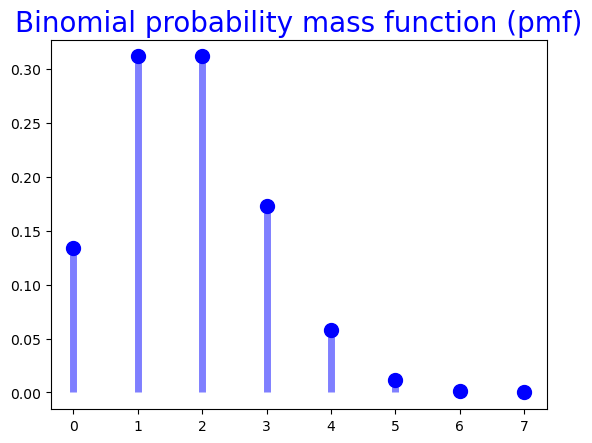

In [93]:
# Gráfico para pintar la binomial (para todos los valores de k) (pmf = probability mass distribution)
fig, ax = plt.subplots(1, 1)
# First we create arrays with all posible values for this variable...
x = np.arange(start = 0, stop = n + 1, step = 1)
# ... and their probabilities: (las de todosl os valores posibles de k)
probs_x = stats.binom.pmf(x, n, p)
# Esto para pontar las rectas (existe hlines tambien, para horizontales)
# x array de datos [1,7]
# ymin ymax para delimitar el eje y
# lw es para el ancho de las rayas
# alpha para la transparencia
ax.vlines(x, ymin = 0, ymax = probs_x, colors='b', lw=5, alpha=0.5)
# Esto para pintar los puntos
# pintamos x y su probabilidad, sin linea (porque ya estaba arriba pintada)
# marker indicamos que lo muestre con un o
ax.plot(x, probs_x, linestyle = '', marker = 'o', color ='blue', markersize=10)
getPlot = ax.set_title("Binomial probability mass function (pmf)", fontsize=20, color="blue")

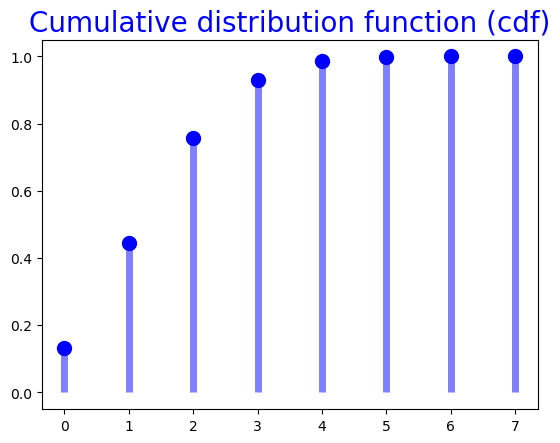

In [96]:
# para pintar la cdf (mismos gráficos, funcion acumulada)
fig, ax = plt.subplots(1, 1)
# First we create arrays with all posible values for this variable...
x = np.arange(start = 0, stop = n + 1, step = 1)
# ... and their probabilities: (las de todosl os valores posibles de k, sumando la anterior)
probs_x = stats.binom.cdf(x, n, p)
# Esto para pontar las rectas (existe hlines tambien, para horizontales)
# x array de datos [1,7]
# ymin ymax para delimitar el eje y
# lw es para el ancho de las rayas
# alpha para la transparencia
ax.vlines(x, ymin = 0, ymax = probs_x, colors='b', lw=5, alpha=0.5)
# Esto para pintar los puntos
# pintamos x y su probabilidad, sin linea (porque ya estaba arriba pintada)
# marker indicamos que lo muestre con un o
ax.plot(x, probs_x, linestyle = '', marker = 'o', color ='blue', markersize=10)
getPlot = ax.set_title("Cumulative distribution function (cdf)", fontsize=20, color="blue")

### Tipos de binomiales
#### n pequeña --> Trabajamos directamente, sin modificaciones

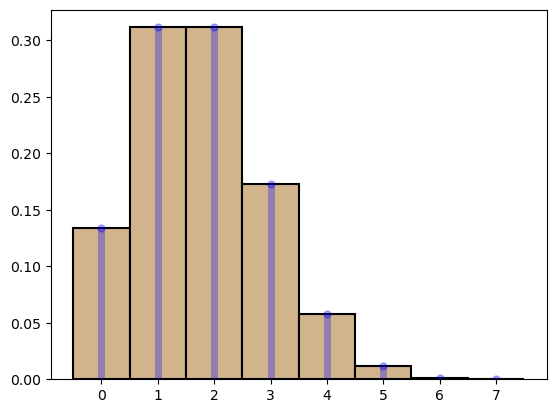

In [107]:
fig, ax = plt.subplots(1, 1)
n = 7
p = 0.25
# First we create arrays with all posible values for this variable...
x = np.arange(start = 0, stop = n + 1, step = 1)
# ... and their probabilities:
probs_x = stats.binom.pmf(x, n, p)
# The next comand plots the "leaf" part
ax.vlines(x, ymin = 0, ymax = probs_x, colors='b', lw=5, alpha=0.3)
ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
# And this one plots the "stem"
getPlot = ax.plot(x, probs_x, linestyle = '', marker = 'o', color ='blue', markersize=5, alpha=0.3)

#### n grande y p exagerada (muy cercana a 0 o 1) --> Se asemejan a la poisson

(0.0, 50.0)

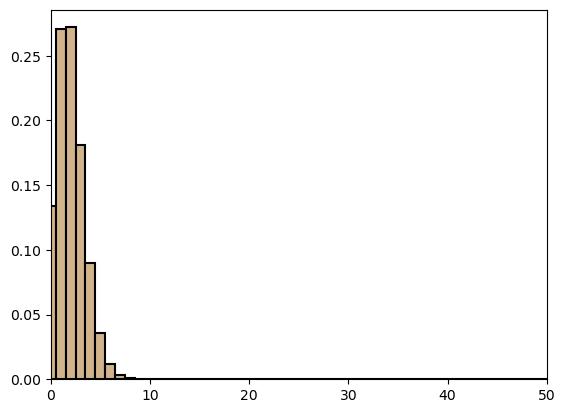

In [108]:
fig, ax = plt.subplots(1, 1)
n = 200
p = 0.01
x = np.arange(start = 0, stop = n + 1, step = 1)
probs_x = stats.binom.pmf(x, n, p)
getPlot = ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
plt.xlim(left=0, right=50)

#### n grande y p moderada --> Se asemejan a la normal

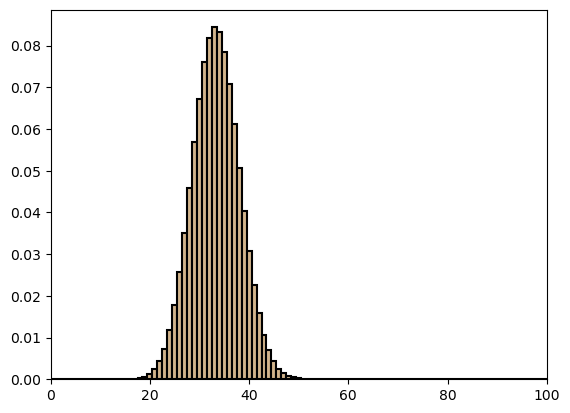

In [109]:
fig, ax = plt.subplots(1, 1)
n = 100
p = 1/3
x = np.arange(start = 0, stop = n + 1, step = 1)
probs_x = stats.binom.pmf(x, n, p)
ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
getPlot = plt.xlim(left=0, right=100)

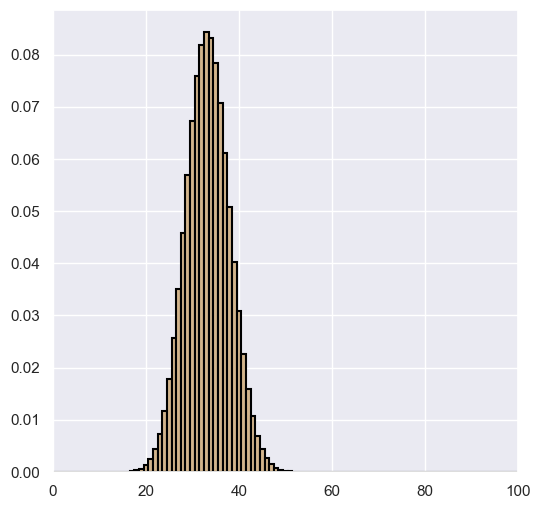

In [163]:
fig, ax = plt.subplots(1, 1)
n = 100
p = 1/3
x = np.arange(start = 0, stop = n + 1, step = 1)
probs_x = stats.binom.pmf(x, n, p)
ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
getPlot = plt.xlim(left=0, right=100)

<AxesSubplot:ylabel='Density'>

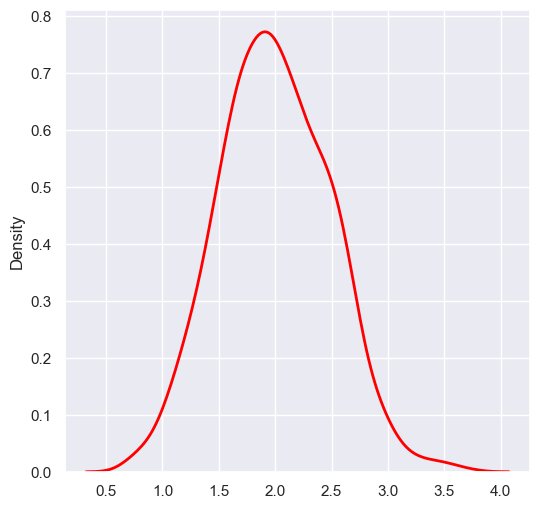

In [164]:
# Pintar distribuciones
# We can plot the empirical density curve of X3  with
N= 1000
mu2 = 2
sigma2 = 1/2
Norm_distr = stats.norm(loc = mu2, scale = sigma2).rvs(size = N)
fig, ax = plt.subplots(1, 1)
sns.kdeplot(Norm_distr, linewidth=2, color = "red")

# Ejercicios
+ **Exercise:** use NumPy to do the experiment with a million dice rolls and get their absolute and relative frequency table.

In [13]:
# Total number of dice rolls
N = 1000000

# Initialize the random number generator
rng = np.random.default_rng(2022)

# Here we generate the N dice rolls. Note that high = 7
dice = rng.integers(low = 1, high = 7, size=N )

# Let us see the first rolls of the dice
print("First rolls: ", dice[:30])

# We have seen how to do this with a pandas dataFrame. 
# But dice is a NumPy array, so we first convert it:
X = pd.DataFrame(dice, columns=["value"])

# and now we use the pandas method we know:

# absolute frequencies
AbsFreq_X = X['value'].value_counts().rename_axis('AbsFreq').sort_index()
print("\n", "--"*5, "\n")
print("Absolute frequencies:\n")
print(AbsFreq_X)

# relative frequencies
RelFreq_X = X['value'].value_counts(normalize=True).rename_axis(
    'RelFreq').sort_index()
print("\n", "--"*5, "\n")
print("Relative frequencies:\n")
print(RelFreq_X)

# If you need to use NumPy methods you can do this:
print("\n", "--"*5, "\n")
n = np.unique(dice).size
print("Number n of unique X values = ", n)

# absolute frequencies
abs_freq_np = np.array(np.unique(dice, return_counts=True)).T
print("\n", "--"*5, "\n")
print("Absolute frequencies with NumPy:\n")
print(abs_freq_np)

# relative frequencies
rel_freq_np = stats.relfreq(dice, numbins=n).frequency
print("\n", "--"*5, "\n")
print("Relative frequencies with NumPy and Scipy:\n")
print(rel_freq_np.reshape((6, 1)))


First rolls:  [5 2 5 1 2 4 6 1 1 4 6 5 5 1 4 1 1 3 6 6 3 6 1 2 4 4 3 2 1 2]

 ---------- 

Absolute frequencies:

AbsFreq
1    166789
2    166850
3    166965
4    166901
5    166281
6    166214
Name: value, dtype: int64

 ---------- 

Relative frequencies:

RelFreq
1    0.166789
2    0.166850
3    0.166965
4    0.166901
5    0.166281
6    0.166214
Name: value, dtype: float64

 ---------- 

Number n of unique X values =  6

 ---------- 

Absolute frequencies with NumPy:

[[     1 166789]
 [     2 166850]
 [     3 166965]
 [     4 166901]
 [     5 166281]
 [     6 166214]]

 ---------- 

Relative frequencies with NumPy and Scipy:

[[0.166789]
 [0.16685 ]
 [0.166965]
 [0.166901]
 [0.166281]
 [0.166214]]


**Exercise:** use Python (with NumPy or pandas) to compute $\mu$ and $\sigma^2$ for the random variable $X$ representing the outcome of a honest dice. 

In [36]:
# SOLUCION PANDAS
# Generamos el array de tiradas
X_pd = pd.DataFrame({"numero":(np.arange(1,7)),
                    "frecuencia": (1/6 for i in range(0,6))})
print(X_pd)

mu_X_pd = sum(X_pd["numero"]*X_pd["frecuencia"])
print("La media calculada con pandas es: ", mu_X_pd)

var_X_pd = sum((X_pd["numero"] - mu_X_pd)**2 * X_pd["frecuencia"])
print("La varianza calculada con pandas es:" ,var_X_pd)



print("\n", "--"*20)

# SOLUCION NUMPY
X_np = np.array([np.arange(1,7), [1/6 for i in range(0,6)]]).T
# hacemos .t para trasponer el array
print(X_np, "\n", "--"*20)

mu_X_np = (X_np[:, 0]*X_np[:,1]).sum()
print("La media calculada con numpy es: ", mu_X_np)

var_X_np = ((X_np[:,0] - mu_X_np)**2 * X_np[:,1]).sum()
print("La varianza calculada con numpy es:" ,var_X_np)

   numero  frecuencia
0       1    0.166667
1       2    0.166667
2       3    0.166667
3       4    0.166667
4       5    0.166667
5       6    0.166667
La media calculada con pandas es:  3.5
La varianza calculada con pandas es: 2.9166666666666665

 ----------------------------------------
[[1.         0.16666667]
 [2.         0.16666667]
 [3.         0.16666667]
 [4.         0.16666667]
 [5.         0.16666667]
 [6.         0.16666667]] 
 ----------------------------------------
La media calculada con numpy es:  3.5
La varianza calculada con numpy es: 2.9166666666666665


+ **Framingham:** Success = que el paciente sea hipertenso

  (a) Load the data table into the `framingham` pandas DataFrame. You have done this before.  
    (b) Find the probability that a randomly chosen patient is hypertensive, and call it $p$.  
    (c) Instead of choosing a single patient, suppose that we choose seven patients at random and with replacement. Let $X$ denote the number of hypertensive patients among those seven. What values can this variable $X$ actually take?  
    (d) Use Python to choose a sample of seven patients (with replacement) and count the number of hypertensive patients in that sample.  
    (e) Iterate the previous step $N = 50000$ times and store the 50000 results in a NumPy array called `X_samples`. Get a relative frequency table of the different values in `X_samples.`  
    (f) Choose the right plot to illustrate the contents of `X_samples`.

In [40]:
# (a) Import the framingham data set
framingham_url = "https://raw.githubusercontent.com/mbdfmad/fmad2122/main/data/framingham.csv"
framingham = pd.read_csv(framingham_url)
framingham.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [101]:
# (b) Compute the probability
p = framingham['prevalentHyp'].value_counts(normalize=True)[1]
print("(b) The probability that a randomly chosen patient has prevalentHyp == 1 equals p = ", p)

(b) The probability that a randomly chosen patient has prevalentHyp == 1 equals p =  0.3106132075471698


In [102]:
# (c) The X variable is a B(7, p) binomial variable, taking all the values from 0 to 7

# (d) To make a sample we use:
n = 7
prevalentHyp_sample = framingham['prevalentHyp'].sample(n, replace=True, random_state=2022)

print("-" * 50, "\n")
print("(c) A seven sample is of prevalentHyp values is: ")
print(prevalentHyp_sample)
print("The number of hypertensive patients in the sample is (the sum):")
print(prevalentHyp_sample.sum())

-------------------------------------------------- 

(c) A seven sample is of prevalentHyp values is: 
1244    0
173     0
2066    0
24      1
2849    0
11      0
2195    0
Name: prevalentHyp, dtype: int64
The number of hypertensive patients in the sample is (the sum):
1


In [103]:
# (e) Now we iterate this process using the size parameter:
# Con las 50000 repeticiones podemos calcular frecuencias relativas, y calcular probabilidades.
N = 50000
np_prevHyp = np.array(framingham["prevalentHyp"])
rng = np.random.default_rng(seed= 2022)
# El size es para hacer una matriz (50000*7), coge 500000 muestras de 7
X_samples = rng.choice(np_prevHyp, size = (N,n), replace = True)
X_samples = rng.choice(np_prevHyp, size = (N, 7), replace = True)

print("-" * 50, "\n")
print("The first elements in X_samples are (a sample per row)")
print(X_samples[:10])

print("and the number of hypertensive patients in each sample is")
num_hyp_X_sample = X_samples.sum(axis = 1)
print(num_hyp_X_sample)

print("The relative frequencies of each possible number of hypertensive patients is")
num_hyp_X_sample_pd =  pd.DataFrame(num_hyp_X_sample, columns=["numb_hypten"])
relFreqs = num_hyp_X_sample_pd.value_counts(normalize = True).sort_index()
print(relFreqs)


-------------------------------------------------- 

The first elements in X_samples are (a sample per row)
[[0 0 0 0 1 1 0]
 [1 0 0 0 1 0 0]
 [0 1 1 0 1 0 0]
 [0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]
 [1 0 0 0 0 1 1]
 [0 1 1 0 1 0 1]
 [0 1 1 0 1 0 0]
 [0 1 0 0 0 0 0]]
and the number of hypertensive patients in each sample is
[2 2 3 ... 3 5 1]
The relative frequencies of each possible number of hypertensive patients is
numb_hypten
0              0.07554
1              0.23332
2              0.31490
3              0.23690
4              0.10616
5              0.02840
6              0.00460
7              0.00018
dtype: float64


-------------------------------------------------- 



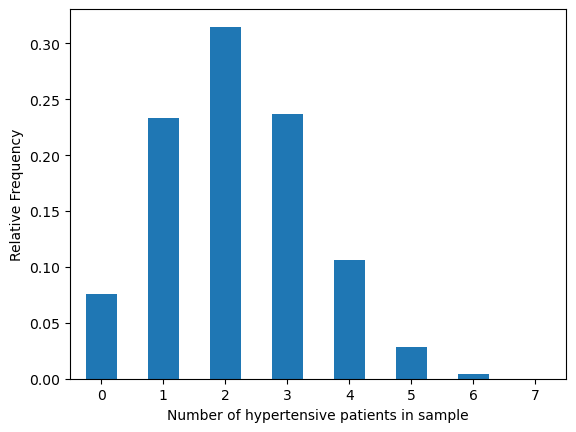

In [104]:
# (f) Plot the relative frequencies.
print("-" * 50, "\n")
plot = relFreqs.plot.bar(rot=0, 
                         xlabel='Number of hypertensive patients in sample', 
                         ylabel ='Relative Frequency')
# Para poner bien el eje x, sino sale
getPlot = plt.xticks(np.arange(8), np.arange(8)) 

+ **Exercise:**    
    (a) Utiliza Python para obtener las probabilidades teóricas de la variable binomial del ejercicio anterior. Recuerda que $X$ = número de pacientes hipertensos en una muestra (con reemplazo) de siete pacientes del conjunto de datos de framingham.  
    (b) Compara los valores teóricos con las frecuencias relativas que has obtenido en ese ejercicio para $N = 50000$ muestras de tamaño 7.

In [105]:
## Exercise S04-004

print("Recall that the probability that a randomly chosen patient has prevalentHyp == 1 equals p ≈",
      np.round(p, decimals=4))
print("The X variable is a B(7,", np.round(p, decimals=4), ") binomial variable.")
print("Its theoretical table of probabilities is ")
x = np.arange(start = 0, stop = n + 1)
probs_x = stats.binom.pmf(x, n, p)
binom_probs = pd.DataFrame({"num_hypten": x.astype(int), "binomial_probs": probs_x})
print(binom_probs)
print("\n And the empirical relative frequencies that we obtained before are:")
print(relFreqs)



Recall that the probability that a randomly chosen patient has prevalentHyp == 1 equals p ≈ 0.3106
The X variable is a B(7, 0.3106 ) binomial variable.
Its theoretical table of probabilities is 
   num_hypten  binomial_probs
0           0        0.074002
1           1        0.233397
2           2        0.315482
3           3        0.236908
4           4        0.106742
5           5        0.028857
6           6        0.004334
7           7        0.000279

 And the empirical relative frequencies that we obtained before are:
numb_hypten
0              0.07554
1              0.23332
2              0.31490
3              0.23690
4              0.10616
5              0.02840
6              0.00460
7              0.00018
dtype: float64


+ **Exercise: MEDIA Y VARIANZA DE UNA DISTRIBUCIÓN UNIFORME (TEORICO Y PYTHON)**  
(a) Using the above results check the formulas for the mean and variance of the uniform distribution.  
(b) Generate a hundred million points uniformly distributed in the square $[-1, 1]\times[-1, 1]$. Count how many of them are at a distance less 
than 1 from the origin.  
(c) Plot the first $n = 5000$ points and those among them that verify the condition about the distance.  
(d) Use your results to estimate the number $\pi$.

In [112]:
# a) Hacer la media de los 20000 valores y ver si sale lo que debería
# 12 -(-5)/2
print("La media: " + str(X.mean()))
print("La media teórica: " + str((a+b)/2))
# La varianza
print("La varianza:" + str(X.var()))
# La varianza teórica
print("La varianza teórica: " + str((b-a)**2 / 12))

La media: 3.5199027103267277
La media teórica: 3.5
La varianza:24.165822741258594
La varianza teórica: 24.083333333333332


In [114]:
# b) La idea es coger un cuadrado que vaya del -1 al 1,
# nos imaginamos una circunferencia dentro del cuadrado que vaya del -1 al 1 (radio 1)
# nos imaginamos dardos que atraviesan el cuadrado y el circulo. Cuentas los dardos que han caido en el círculo.
# Al final de la cuenta, la idea es que nos salga un numero PI
N = 10000000
a = -1
b =  1
XY = np.random.default_rng(2022).uniform(low = a, high = b, size = (N, 2))
print("These are the first random points in the square:")
print(XY[0:10])

# Let us see how many of these are closer than 1 to the origin.
# XY_dist will be a boolean array with the answers to the distance condition.
XY_dist = XY[:, 0]**2 +  XY[:, 1]**2 < 1

print("Booleans to check the distance condition:")
print(XY_dist[0:10])

print("The number of points inside the circle of radius 1 is:")
print(XY_dist.sum())

# La primera parte devuelve una lista de true false, para saber si ha entrado o no el dardo en el circulo
# Al multiplicarlo por 4 nos tiene que dar el area del circulo. 4 es el area del cuadrado(2*2). Como sabemos 
# la proporcion que ocupa el circulo


These are the first random points in the square:
[[-0.50514787 -0.81401988]
 [ 0.22352675 -0.87867585]
 [ 0.32206686  0.51031556]
 [-0.7782622  -0.91388831]
 [-0.17116505  0.97725851]
 [ 0.93839738 -0.48605694]
 [ 0.11752422 -0.51530405]
 [-0.35595942  0.7827195 ]
 [ 0.89222733  0.44507863]
 [ 0.85694874  0.99217402]]
Booleans to check the distance condition:
[ True  True  True False  True False  True  True  True False]
The number of points inside the circle of radius 1 is:
7853721
Área del círculo calculado: 3.1413284


------------------------------ 

 (c)

See the plot below


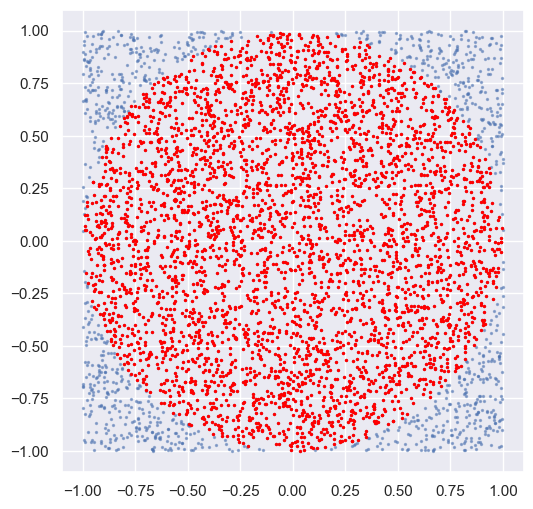

In [139]:
# (c) Plot the first points.
print("-" * 30, "\n\n", "(c)\n")
print("See the plot below")

n = 5000
first_n = XY[0:n]

# Which are inside the circle? array de true false
first_n_in = (first_n[:, 0]**2 +  first_n[:, 1]**2 < 1)

# Use this to select them. Haciendo esto solo nos quedamos con los trues
first_dist = first_n[first_n_in]

# And now first plot all the points 
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(6, 6)})
ax.set_aspect('equal')
# Aqui está pintando el cuadrado
plt.scatter(x = XY[0:n, 0], y = XY[0:n, 1], s = 2, alpha = 0.5)
# Aqui está pintando el círculo
# and then plot those inside
# x, y variables a comparar
# color =para personalizar, diferencia las clases sin tener que indicarlo
# s es el tamaño de los puntos.
getPlot = plt.scatter(x = first_dist[0:n, 0], 
                     y = first_dist[0:n, 1], 
                    s = 2, color = "red")

In [115]:
# (d) Approximate pi
print("-" * 30, "\n\n", "(d)\n")

# The fraction of points inside the circle is the same quotient as
# (area circle) / (area square) = pi / 4
# Thus we only need to multiply that quotient times 4:
print("The approximate value of pi is:")
print(4 * XY_dist.sum() / N )
print("And that is pretty cool, right?")

------------------------------ 

 (d)

The approximate value of pi is:
3.1414884
And that is pretty cool, right?


+ **Ejercicio:** recordemos que en un ejercicio anterior generamos y graficamos un millón de puntos distribuidos uniformemente en el cuadrado $[-1, 1]\times[-1, 1]$. Repite de nuevo ese código pero esta vez genera sólo 10000 puntos. A continuación, genera 10000 puntos más $(x, y)$ donde tanto $x$ como $y$ son variables aleatorias normales con $\mu = 0, \sigma = 1$. Añade este segundo conjunto de puntos al mismo gráfico utilizando un color diferente (pista: utiliza "alfa" para controlar el sobretrazado). ¿Ve la diferencia?

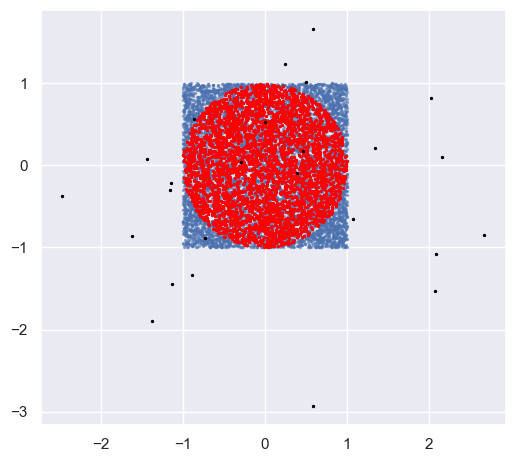

In [144]:
# mismo ejercicio que el de pi, esta vez generamos XY con la normal, en lugar de la uniforme
N2 = 10000
a = -1
b =  1
XY2 = np.random.default_rng(2022).normal(loc = 0, scale = 1, size = (N, 2))
n = N2
first_n = XY[0:n]

# First plot the first N2 uniform points 
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(6, 6)})
ax.set_aspect('equal')
plt.scatter(x = XY[0:n, 0], y = XY[0:n, 1], s = 2, alpha = 0.5)
# añadimos el circulo de antes
getPlot = plt.scatter(x = first_dist[0:n, 0], 
                     y = first_dist[0:n, 1], 
                    s = 2, color = "red")
# then plot the random normal points
getPlot = plt.scatter(x = XY2[0:n, 0], y = XY2[0:n, 1], s = 2, color = "black", alpha = 1)

+ **Ejercicio:**  
$(a)$ Generar un par de muestras grandes (`N = 3000`) del mismo tamaño de $X_1\sim N(-3, 1)$ y $X_2\sim N(2, 1/2)$. Combina esas muestras para obtener una muestra de la variable normal $X_3 = 3 X_1 + 4 X_2$.  
$(b)$ ¿Qué tipo de normal es $X_3$? Es decir, ¿cuáles son los valores teóricos de $\mu$ y $\sigma$ para $X_3$?  
$(c)$ Compáralos con tus valores empíricos.  
$(d)$ Traza la curva de densidad de la muestra $X_3$. Lee esta página de los [SciPy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) y averigua cómo añadir al gráfico el `pdf` teórico de esta variable aleatoria normal $X_3$. ¿Confirma el resultado anterior?  
$(e)$ Consideremos ahora la *mezcla* de $X1$ y $X2$. Para ello sólo tienes que concatenar ambas matrices de NumPy. Mira esta [Sección sobre concatenación de arrays del Manual de Ciencia de Datos de Python](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html#Array-Concatenation-and-Splitting) para aprender a hacer este tipo de operaciones en arrays de varias formas. Una vez que hayas concatenado los arrays traza (en un nuevo gráfico diferente) la curva de densidad de la muestra resultante. ¿Qué aspecto tiene? ¿Es normal?

In [155]:
## (a)
np.random.seed(2022)
N = 3000

# Let us generate both normal samples
mu1 = -3
sigma1 = 1
X1 = stats.norm(loc = mu1, scale = sigma1).rvs(size = N)

mu2 = 2
sigma2 = 1/2
X2 = stats.norm(loc = mu2, scale = sigma2).rvs(size = N)

# As they are NumPy arrays the combination is simple:
X3 = 3 * X1 + 4 * X2

In [157]:
## (b)
print("-" * 30, "\n\n", "(b)\n")
mu3 = 3 * mu1 + 4 * mu2
sigma3 = np.sqrt(3**2 * sigma1 **2 + 4**2 * sigma2 **2)
print("The theoretical parameters of the linear combination X3 are:")
print("mu3 = ", mu3)
print("sigma3 = ", sigma3)

------------------------------ 

 (b)

The theoretical parameters of the linear combination X3 are:
mu3 =  -1
sigma3 =  3.605551275463989


In [159]:
## (c)
print("-" * 30, "\n\n", "(b)\n")

print(" The empirical sample of the linear combination has ")
print("mean = ", X3.mean())
print("standard deviation = ", X3.std())

------------------------------ 

 (b)

 The empirical sample of the linear combination has 
mean =  -0.9310139611299169
standard deviation =  3.6310999164205584


------------------------------ 

 (d)

See pictures below


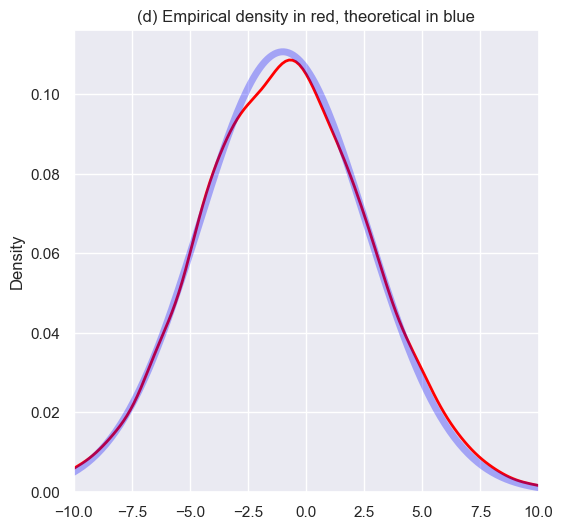

In [162]:
## (d)
print("-" * 30, "\n\n", "(d)\n")

print("See pictures below")
# We can plot the empirical density curve of X3  with
fig, ax = plt.subplots(1, 1)
sns.kdeplot(X3, linewidth=2, color = "red")

# And then we add the theoretical density to the plot using pdf (para pintar la distribucion de la normal)
#and plotting the values of pdf for a set of nodes across the range of the variable
x = np.linspace(-10, 10, 200) # vamos a calcular la normal para 200 ptos entre -10 y 10
ax.plot(x, stats.norm(loc = mu3, scale = sigma3).pdf(x), lw=5, color = "blue", alpha = 0.3)
plt.xlim(left=-10, right=10)
getPlot = ax.set_title("(d) Empirical density in red, theoretical in blue")


------------------------------ 

 (e)



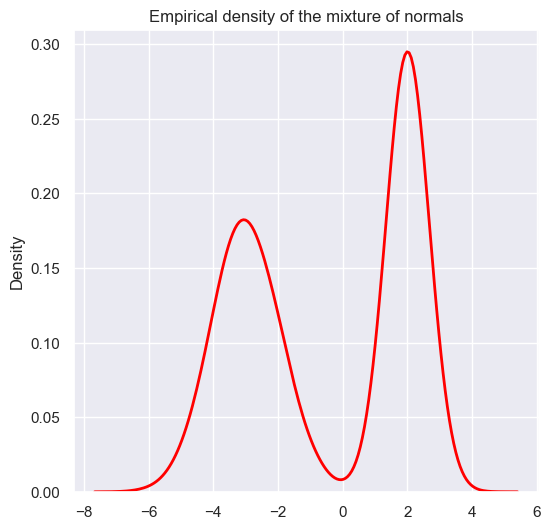

In [165]:
## (e)
print("-" * 30, "\n\n", "(e)\n")

fig, ax = plt.subplots(1, 1)

# The mixture can be easily obtained with hstack
X4 = np.concatenate((X1, X2))
# And the plot of the mixture density is
sns.kdeplot(X4, linewidth=2, color = "red")
getPlot = ax.set_title("Empirical density of the mixture of normals")